In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import logging
import imp
from rpy2.robjects import numpy2ri

RANDOM_SEED = 0
numpy2ri.activate()

import fairtest.utils.log as fairtest_log
imp.reload(fairtest_log)
fairtest_log.set_params(filename='fairtest.log', level=logging.INFO)

In [56]:
from fairtest import DataSource
import fairtest.investigation as inv
import fairtest.testing as testing
import fairtest.discovery as discovery
import fairtest.error_profiling as error_profiling
import fairtest.modules.metrics as metrics
import fairtest.modules.metrics.correlation as correlation
import fairtest.modules.metrics.regression as regression
import fairtest.modules.metrics.binary_metrics as binary_metrics
import fairtest.modules.statistics.confidence_interval as intervals
import ast
import sklearn.preprocessing as preprocessing

'''
dataname = 'adult'
data = pd.read_csv(
            '../data/adult/adult.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
data = data.drop('fnlwgt', axis=1)
#data['race'] = map(lambda x: 'Asian' if 'Asian' in x else 'Indian' if 'Indian' in x else x, data['race'])
#data['race'] = map(lambda x: 'Asian' if 'Asian' in x else 'Black & Other' if ('Indian' in x or 'Other' in x or 'Black' in x) else x, data['race'])
TARGET = 'income'
SENS = ['sex', 'race']
EXPL = []
'''

'''
dataname = 'medical_bin'
data = pd.read_csv(
            '../data/medical/predictions_bin.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
TARGET = 'Prediction'
GROUND_TRUTH = 'Ground_Truth'
SENS = ['Age']
EXPL = []
'''
'''
dataname = 'medical_reg'
data = pd.read_csv(
            '../data/medical/predictions_reg_log.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
TARGET = 'Prediction'
GROUND_TRUTH = 'Ground_Truth'
SENS = ['Age']
EXPL = []
'''
'''
dataname = 'berkeley'
data = pd.read_csv(
            '../data/berkeley/berkeley.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
TARGET = 'accepted'
SENS = ['gender']
EXPL = ['department']
EXPL = []
'''
'''
dataname = 'staples'
data = pd.read_csv(
            '../data/staples/staples.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
data = data.drop('zipcode', axis=1)
data = data.drop('distance', axis=1)
data = data.drop('city', axis=1)
TARGET = 'price'
SENS = ['income', 'race']
EXPL = []
'''
'''
data['race'] = map(lambda x: 'Asian' if 'Asian' in x else 
                   'Indian & Alaska Native' if 'Indian' in x  else
                   'Black' if 'Black' in x  else
                   'Pacific Islander' if 'Pacific' in x else
                   'White' if 'White' in x else
                   'Hispanic' if 'Latino' in x else
                   '2+ Races' if 'Two' in x else
                   'Other' if 'Other' in x else
                    x, data['race'])
'''
'''
dataname = 'overfeat'
data = pd.read_csv(
            '../data/images/overfeat_raw.txt',
            header=0,
            sep=r'\s*\t\s*',
            engine='python',
            na_values="?")
TARGET = 'Labels'
SENS = ['Race']
EXPL = []
labeled_data = map(lambda s: ast.literal_eval(s), data[TARGET])
for l in labeled_data:
    assert len(l) == 5
label_encoder = preprocessing.MultiLabelBinarizer()
labeled_data = label_encoder.fit_transform(labeled_data)
labels = label_encoder.classes_
df_labels = pd.DataFrame(labeled_data, columns=labels)
data = pd.concat([data.drop(TARGET, axis=1), df_labels], axis=1)
TARGET = labels.tolist()
'''

'''
dataname = 'caffe'
data = pd.read_csv(
            '../data/images/caffe.txt',
            header=0,
            sep=r'\s*\t\s*',
            engine='python',
            na_values="?")
TARGET = 'Labels'
SENS = ['Race']
EXPL = []
labeled_data = map(lambda s: ast.literal_eval(s), data[TARGET])
for l in labeled_data:
    assert len(l) == 5
label_encoder = preprocessing.MultiLabelBinarizer()
labeled_data = label_encoder.fit_transform(labeled_data)
labels = label_encoder.classes_
df_labels = pd.DataFrame(labeled_data, columns=labels)
data = pd.concat([data.drop(TARGET, axis=1), df_labels], axis=1)
TARGET = labels.tolist()
'''
'''
dataname = 'benchmark'
data = pd.read_csv(
            '../data/benchmark/benchmark.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
TARGET = 'price'
SENS = ['race', 'income']
EXPL = []
'''

dataname = 'ny-human-rights'
data = pd.read_csv(
            '../data/ny_human/age_layoff_data.csv',
            header=0,
            sep=r'\s*,\s*',
            engine='python',
            na_values="?")
TARGET = 'Selected'
SENS = ['Age']
EXPL = []

data['Age'] = np.round(data['Age'],-1)

#metrics = {'gender': 'Diff'}
metrics = {}

budget=1
data_source = DataSource(data, random_state=RANDOM_SEED, budget=budget, train_size=0.5/(budget+1), conf=0.5)

exp = testing.Testing(data_source, SENS, TARGET, EXPL, metrics=metrics, random_state=RANDOM_SEED)
#exp = error_profiling.ErrorProfiling(data_source, SENS, TARGET, GROUND_TRUTH, EXPL, metrics=metrics, random_state=RANDOM_SEED)
#exp = discovery.Discovery(data_source, SENS, TARGET, EXPL, metrics=metrics, train_size=0.5, topk=35, random_state=RANDOM_SEED)
print 'Training set: {}/{}'.format(len(exp.train_set), len(data))
exp.train_set.tail()

INFO:root:Encoding Feature #Division
INFO:root:Encoding Feature Title
INFO:root:Encoding Feature Selected
INFO:root:Training Size 315
INFO:root:Testing Sizes [948]
INFO:root:New Testing Investigation
INFO:root:Target Feature: Target(names=['Selected'], arity=2)
INFO:root:Choosing metric CORR for feature Age


Training set: 315/1263


,#Division,Title,Age,Selected
763,5,73,40,0
835,5,139,30,0
1216,6,361,20,1
559,3,326,60,1
684,3,507,50,0


In [57]:
import fairtest.modules.context_discovery.guided_tree as guided_tree
#imp.reload(guided_tree)
inv.train([exp], score_aggregation='avg', min_leaf_size=20, max_depth=5)

INFO:root:Begin training phase with protected feature Age
INFO:root:Building a Guided Decision Tree
INFO:root:splitting on #Division (score=0.0754102435861) with threshold None at pred []


In [54]:
print exp.trained_trees['Age']


   /-#Division = 5
  |
  |--#Division = 2
  |
--|--#Division = 3
  |
  |--#Division = 6
  |
   \-#Division = 1


In [58]:
import fairtest.modules.statistics.hypothesis_test as tests
import fairtest.modules.statistics.multiple_testing as multitest
import fairtest.modules.context_discovery.tree_parser as tree_parser
import fairtest.modules.statistics.confidence_interval as intervals

inv.test([exp], exact=True, prune_insignificant=False)

INFO:root:Parsing tree for sensitive feature Age...
INFO:root:Parsed tree for sensitive feature Age
INFO:root:Begin testing phase
INFO:root:Testing 6 hypotheses
INFO:root:Computing stats for 6 contexts
INFO:root:Computing stats for context 0
INFO:root:Computing stats for context 1
INFO:root:Computing stats for context 2
INFO:root:Computing stats for context 3
INFO:root:Computing stats for context 4
INFO:root:Computing stats for context 5


Commit Hash: 	63fb2056675c9519f408902bb36305c99f84a927

Dataset: ny-human-rights
Train Size: 315
Test Size: 948
S: ['Age']
X: ['Title', '#Division']
E: None
O: ['Selected']

Train Params: 	{'max_bins': 10, 'min_leaf_size': 20, 'max_depth': 5, 'agg_type': 'avg'}
Test Params: 	{'prune_insignificant': False, 'exact': True, 'family_conf': 0.5}
Report Params: 	{'node_filter': 'all'}

Report of associations of O=['Selected'] on Si = Age:
Association metric: CORR

Global Population 0 of size 948



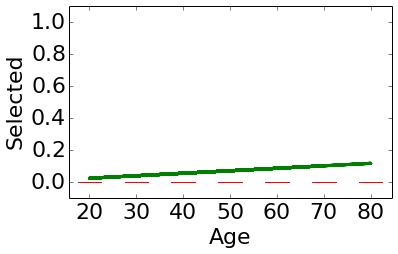

INFO:root:Filtering and ranking 6 sub-contexts
INFO:root:5 statistically significant sub-contexts
INFO:root:Size range: 73-302
INFO:root:5 sub-contexts printed


p-value = 1.60e-01 ; CORR = [0.0196, 0.1188]

Sub-Population 2 of size 248
Context = {'#Division': 'Healthcare Operations'}



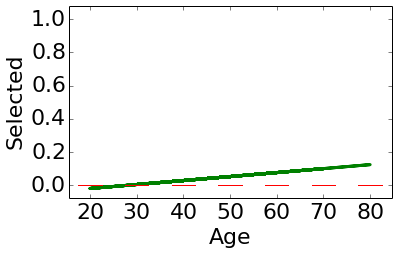

p-value = 1.60e-01 ; CORR = [0.0769, 0.2035]
--------------------------------------------------------------------------------

Sub-Population 1 of size 302
Context = {'#Division': 'Operations'}



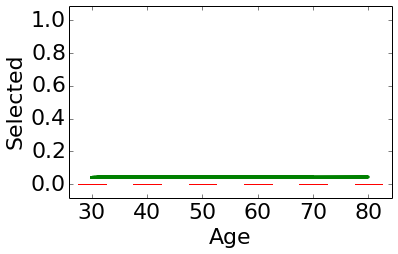

p-value = 1.00e+00 ; CORR = [-0.0779, 0.0839]
--------------------------------------------------------------------------------

Sub-Population 3 of size 191
Context = {'#Division': 'Information Technology'}



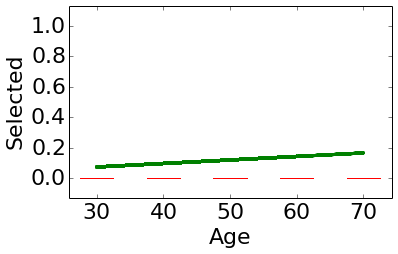

p-value = 1.00e+00 ; CORR = [-0.0608, 0.2044]
--------------------------------------------------------------------------------

Sub-Population 4 of size 91
Context = {'#Division': 'Sales and Marketing'}



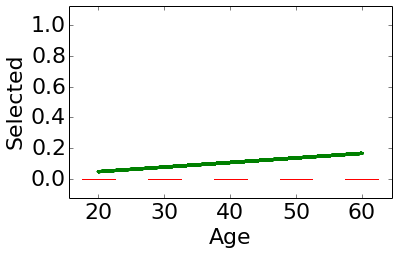

p-value = 1.00e+00 ; CORR = [-0.0662, 0.2726]
--------------------------------------------------------------------------------

Sub-Population 5 of size 73
Context = {'#Division': 'Finance'}



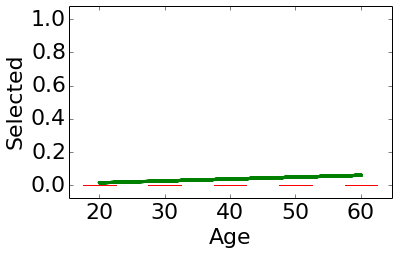

p-value = 1.00e+00 ; CORR = [-1.0000, 0.2067]
--------------------------------------------------------------------------------

Hierarchical printing of subpopulations (summary)


 Context = {} ; CI = [0.0196, 0.1188] ; Size = 948
   Context = {'#Division': 'Operations'} ; CI = [-0.0779, 0.0839] ; Size = 302
   Context = {'#Division': 'Healthcare Operations'} ; CI = [0.0769, 0.2035] ; Size = 248
   Context = {'#Division': 'Information Technology'} ; CI = [-0.0608, 0.2044] ; Size = 191
   Context = {'#Division': 'Sales and Marketing'} ; CI = [-0.0662, 0.2726] ; Size = 91
   Context = {'#Division': 'Finance'} ; CI = [-1.0000, 0.2067] ; Size = 73
--------------------------------------------------------------------------------



[{},
 {'#Division': 'Operations'},
 {'#Division': 'Healthcare Operations'},
 {'#Division': 'Information Technology'},
 {'#Division': 'Sales and Marketing'},
 {'#Division': 'Finance'}]

In [59]:
import fairtest.modules.bug_report.report as rep
import fairtest.modules.bug_report.filter_rank as fr
imp.reload(rep)
imp.reload(fr)

output_dir = None
inv.report([exp], dataname, output_dir=output_dir, filter_conf=0, node_filter=fr.FILTER_ALL)